In [ ]:
! kaggle datasets download sanikamal/horses-or-humans-dataset

Dataset URL: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset
License(s): other
 96% 295M/307M [00:02<00:00, 116MB/s]
100% 307M/307M [00:02<00:00, 124MB/s]


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import cv2
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop


In [ ]:
zip=zipfile.ZipFile('horses-or-humans-dataset.zip')
zip.extractall()
zip.close()

In [ ]:
train_dir = "/content/horse-or-human/train"
train_dir_horses = '/content/horse-or-human/train/horses'
train_dir_humans = '/content/horse-or-human/train/humans'

val_dir = '/content/horse-or-human/validation'
val_dir_horses = '/content/horse-or-human/validation/horses'
val_dir_humans = '/content/horse-or-human/validation/humans'

In [ ]:
print('total training horse images:', len(os.listdir(train_dir_horses)))
print('total training human images:', len(os.listdir(train_dir_humans)))
print('total validation horse images:', len(os.listdir(val_dir_horses)))
print('total validation human images:', len(os.listdir(val_dir_humans)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
len(os.listdir(train_dir_horses))

500

In [ ]:
model=tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tensorflow.keras.layers.MaxPooling2D(2,2),
    tensorflow.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(2,2),
    tensorflow.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(2,2),
    tensorflow.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(2,2),
    tensorflow.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(2,2),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(512,activation='relu'),
    tensorflow.keras.layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [ ]:
val_generator.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=val_generator,
    validation_steps=8
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4662 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.7448
Epoch 2/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.4922 - loss: 0.7307

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step - accuracy: 0.4922 - loss: 0.7307 - val_accuracy: 0.5586 - val_loss: 0.6774
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - accuracy: 0.5653 - loss: 0.6725 - val_accuracy: 0.8672 - val_loss: 0.3213
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.5781 - loss: 0.5635 - val_accuracy: 0.5000 - val_loss: 1.3686
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.6827 - loss: 0.6370 - val_accuracy: 0.5000 - val_loss: 2.7812
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.5391 - loss: 0.7935 - val_accuracy: 0.6719 - val_loss: 0.6610
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.8270 - loss: 0.4905 - val_accuracy: 0.7656 - val_loss: 0.9299
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.8828 - loss: 0.3517 - val_accuracy: 0.8359 - val_loss: 0.5675
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step - accuracy: 0.8882 - loss: 0.2785 - val_accuracy: 0.8828 - val_loss: 0.6039
Ep

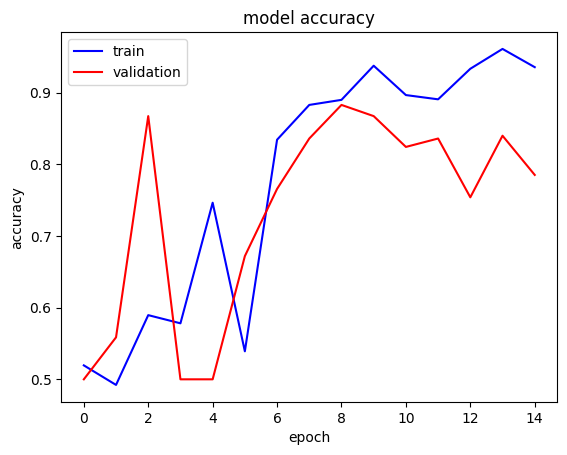

In [ ]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

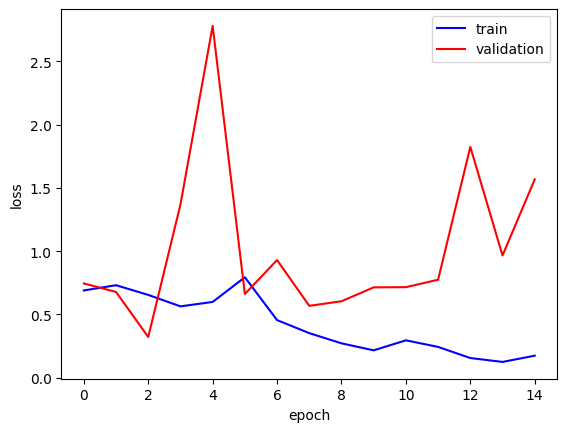

In [ ]:
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='red',label='validation')


plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

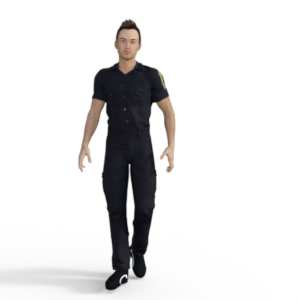

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img=image.load_img('/content/horse-or-human/horse-or-human/validation/humans/valhuman01-00.png',target_size=(300,300))

x= image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img

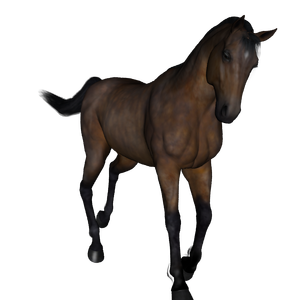

In [ ]:
img=image.load_img('/content/horse-or-human/horse-or-human/validation/horses/horse1-105.png',target_size=(300,300))

x= image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img

In [ ]:
classes=model.predict(x)
if classes[0]>0.5:
  print('human')
else:
  print('horse')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
horse


In [ ]:
model.save("horses_or_humans_model.h5")

In [ ]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("horses_or_humans_model.h5")  # Replace with your model file

# Preprocessing function for input image
def preprocess_image(img):
    # Convert numpy array to PIL image
    img = Image.fromarray(img.astype('uint8'), 'RGB')  # Ensure it's in RGB format
    img = img.resize((300, 300))  # Resize to model's expected input shape (300x300)
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Prediction function
def predict_image(img):
    # Preprocess the image
    img_array = preprocess_image(img)

    # Make prediction
    prediction = model.predict(img_array)

    # Return the result based on the model prediction
    if prediction[0] > 0.5:
        return "Human"
    else:
        return "Horse"

# Create Gradio interface
interface = gr.Interface(fn=predict_image, inputs=gr.Image(), outputs="text")

# Launch the interface
interface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9501f03288d4fd8975.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
